In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from alntk.plotting import default_plot_style
color_cycle = default_plot_style()

In [18]:
sequences = pd.read_csv('../data/uniprotkb_sequences_available.csv')
sequences.columns = ['x', 'y']
structures = pd.read_csv('../data/pdb_structures_available.csv')
structures.columns = ['x', 'y', 'deltay']

In [19]:
structures

,x,y,deltay
0,2024,229380,15321
1,2023,214059,14455
2,2022,199604,14256
3,2021,185348,12571
4,2020,172777,13985
5,2019,158792,11472
6,2018,147320,11155
7,2017,136165,11059
8,2016,125106,10803
9,2015,114303,9244


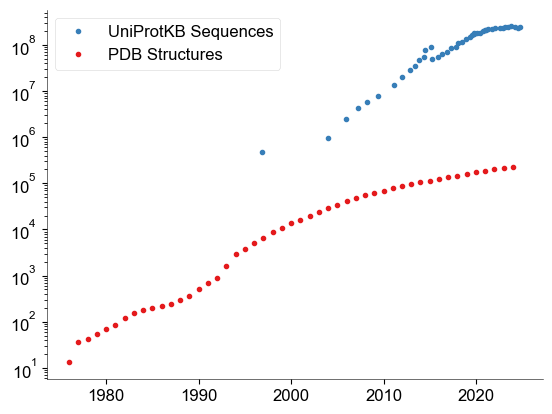

<Figure size 640x480 with 0 Axes>

In [31]:
fig = plt.figure()
plt.plot(sequences['x'], sequences['y'], '.', label='UniProtKB Sequences')
plt.plot(structures['x'], structures['y'], '.', label='PDB Structures')
plt.yscale('log')
plt.legend()
plt.show()

plt.savefig('../assets/data_stats.pdf', bbox_inches='tight')